In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('FinalcopyRegressor.csv')
df1 = pd.read_csv('Finalcopy.csv')
df.head()

,D3,TILT,RSSI,FQ,HR,RSRP
0,39.877324,1.278856,-64,2350,22.099448,-88
1,39.916836,1.275580,-64,2350,22.099448,-88
2,39.996953,1.269063,-63,2350,22.099448,-87
3,39.996953,1.269063,-63,2365,22.099448,-80
4,39.996953,1.269063,-64,2365,22.099448,-80


In [15]:
df.shape

(519, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D3      519 non-null    float64
 1   TILT    519 non-null    float64
 2   RSSI    519 non-null    int64  
 3   FQ      519 non-null    int64  
 4   HR      519 non-null    float64
 5   RSRP    519 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 24.5 KB


In [17]:
df.describe()

,D3,TILT,RSSI,FQ,HR,RSRP
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,45.763138,1.086084,-63.772640,2209.658960,22.962774,-80.921002
std,4.497178,0.149017,1.562823,202.488193,0.764452,7.878881
min,38.762343,0.789675,-71.000000,950.000000,22.099448,-112.000000
25%,41.188721,0.970928,-64.000000,2149.000000,22.099448,-86.000000
50%,46.361440,1.069257,-63.000000,2350.000000,23.204420,-81.000000
75%,48.909990,1.211644,-63.000000,2350.000000,23.204420,-76.000000
max,56.595688,1.398739,-63.000000,2365.000000,24.309392,-57.000000


In [18]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
514    False
515    False
516    False
517    False
518    False
Length: 519, dtype: bool>

In [19]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         D3  TILT    RSSI     FQ     HR   RSRP
0    False  False  False  False  False  False
1    False  False  False  False  False  False
2    False  False  False  False  False  False
3    False  False  False  False  False  False
4    False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...
514  False  False  False  False  False  False
515  False  False  False  False  False  False
516  False  False  False  False  False  False
517  False  False  False  False  False  False
518  False  False  False  False  False  False

[519 rows x 6 columns]>

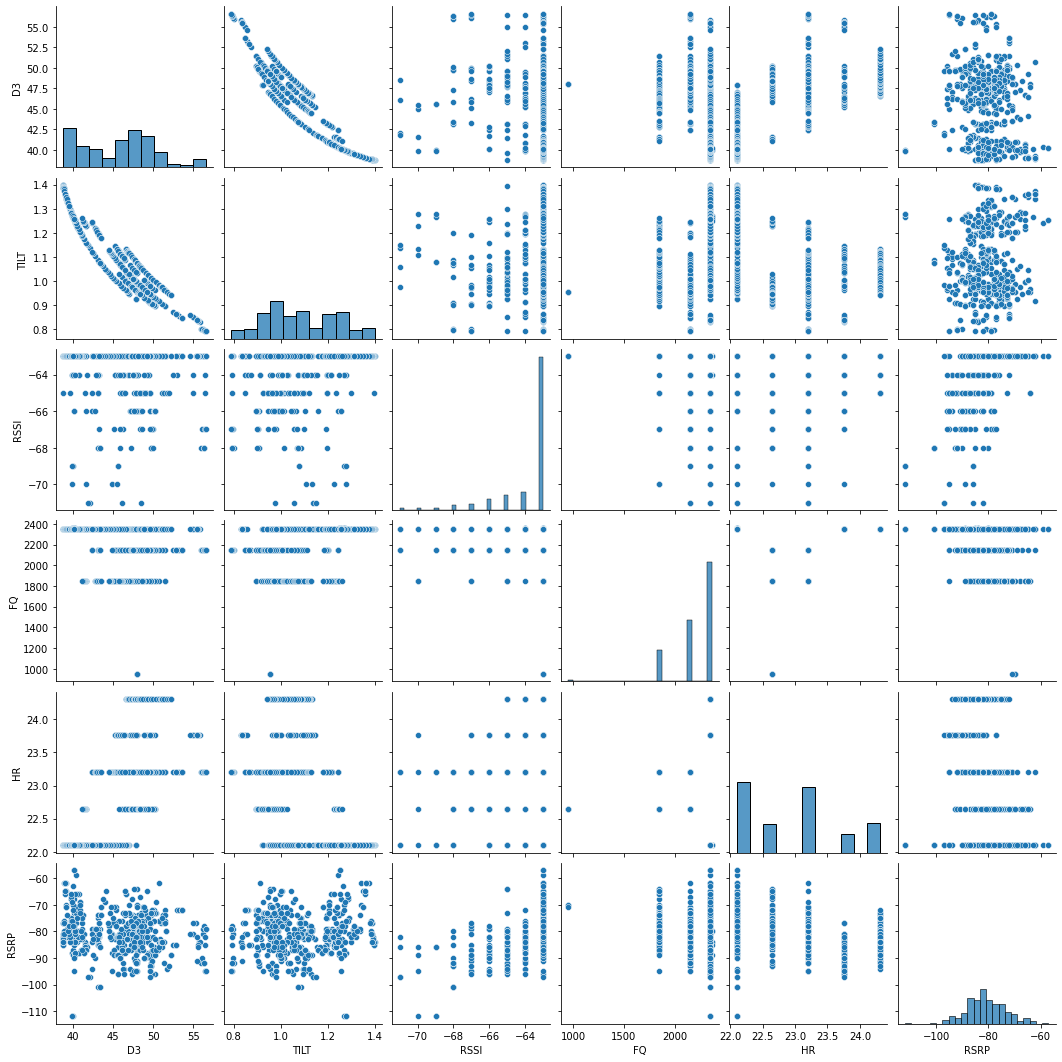

In [12]:
sns.pairplot(df)

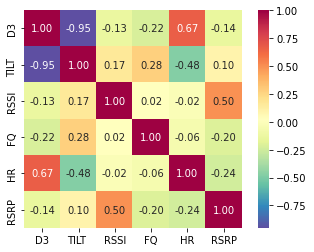

In [20]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [21]:
df.corr()

,D3,TILT,RSSI,FQ,HR,RSRP
D3,1.000000,-0.950028,-0.132940,-0.215175,0.667779,-0.142451
TILT,-0.950028,1.000000,0.165205,0.281514,-0.476177,0.099536
RSSI,-0.132940,0.165205,1.000000,0.022787,-0.016417,0.499770
FQ,-0.215175,0.281514,0.022787,1.000000,-0.056972,-0.197022
HR,0.667779,-0.476177,-0.016417,-0.056972,1.000000,-0.237658
RSRP,-0.142451,0.099536,0.499770,-0.197022,-0.237658,1.000000


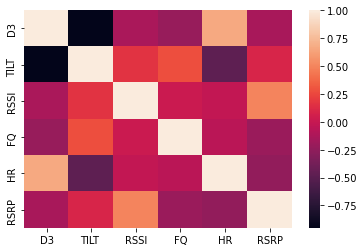

In [22]:
sns.heatmap(df.corr())

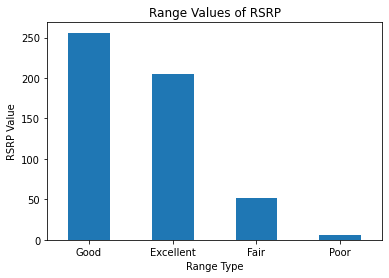

In [23]:
df1.RANGE.value_counts().plot(kind="bar")
plt.title("Range Values of RSRP")
plt.xlabel("Range Type")
plt.xticks(rotation=0)
plt.ylabel("RSRP Value")
plt.show()

In [24]:
print(f"Skewness: {df['RSRP'].skew()}")
print(f"Kurtosis: {df['RSRP'].kurt()}")

Skewness: -0.10100039939683118
Kurtosis: 1.1087617229393567


# Checking Linearity of Data

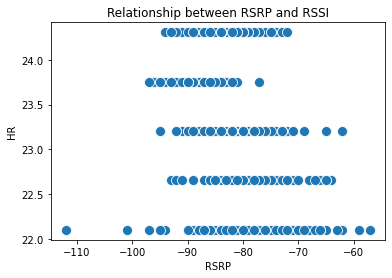

In [25]:
sns.scatterplot(x="RSRP", y="HR", data=df1, palette="Dark2", s=100)
plt.title("Relationship between RSRP and RSSI")
plt.show()

# Outliers Analysis


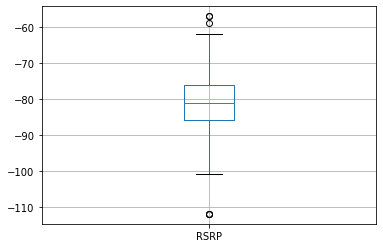

In [26]:
boxplot = df.boxplot(column = ['RSRP'])

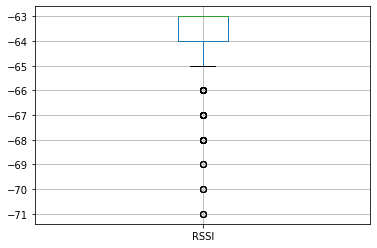

In [27]:
boxplot = df.boxplot(column = ['RSSI'])

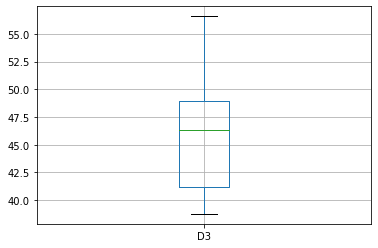

In [28]:
boxplot = df.boxplot(column = ['D3'])

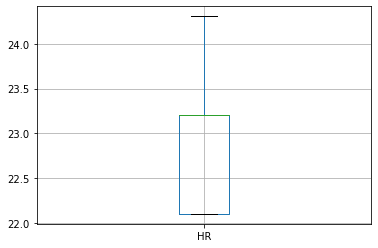

In [29]:
boxplot = df.boxplot(column = ['HR'])

# Independent and Target Variable

In [30]:
x = df.iloc[:,0:5].values
y = df.iloc[:,5].values

# Training and Testing

In [31]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size = 0.3, random_state=500)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_tr,y_tr).score(x_te,y_te)

0.6541485961126431

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators': [10,25,50,75,100],
    'max_features': [1,2,3,4,5],
    'criterion': ['squared_error','absolute_error'],
    'max_depth': [4,5,6,7]
}

rf = RandomForestRegressor(random_state=1)
gs = GridSearchCV(rf,param_grid,cv=5)
gs.fit(x_tr,y_tr)
print("Best parameters:",gs.best_params_)

# Accuracy and Error Metrics

In [ ]:
rf = RandomForestRegressor(criterion='squared_error',max_depth=7,max_features=3,n_estimators=75)
rf.fit(x_tr,y_tr).score(x_te,y_te)

In [ ]:
y_pred = rf.predict(x_te)

In [ ]:
import sklearn.metrics as metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_te, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_te, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,x_tr,y_tr,scoring="r2",cv=5)
print("R2 Coefficient of Determination : ",score.mean())

In [ ]:
from sklearn.model_selection import cross_validate

def cross_validation(model,X,y,cv):
    scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error',]
    results = cross_validate(estimator=model,
                            X=x,y=y,cv=cv,scoring=scoring,return_train_score=True)
    d1 = {"Training meanabserror scores": results['train_neg_mean_absolute_error']}
    print(d1)
    d2 = {"Mean training meanabserror": results['train_neg_mean_absolute_error'].mean()}
    print(d2)
    d3 = {"Training meansqerror scores": results['train_neg_mean_squared_error']}
    print(d3)
    d4 = {"Mean training meansqerror": results['train_neg_mean_squared_error'].mean()}
    print(d4)
    d5 = {"Validation meanabserror scores": results['test_neg_mean_absolute_error']}
    print(d5)
    d6 = {"Mean Validation meanabserror": results['test_neg_mean_absolute_error'].mean()}
    print(d6)
    d7 = {"Validation meansqerror scores": results['test_neg_mean_squared_error']}
    print(d7)
    d8 = {"Mean validation meansqerror": results['test_neg_mean_squared_error'].mean()}
    print(d8)

In [ ]:
result = cross_validation(rf,x,y,10)
print(result)